In [1]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.mnist.load_data()

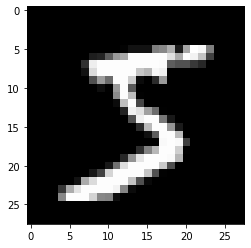

In [3]:
plt.imshow(x_train[0] , cmap = "gray")

In [4]:
x_train = x_train.reshape(-1 , 28 * 28).astype('float') / 255.0
x_test = x_test.reshape(-1 , 28 * 28).astype('float') / 255.0

In [5]:
print(x_train.shape , x_test.shape)

(60000, 784) (10000, 784)


In [6]:
y_train = tf.keras.utils.to_categorical(y_train , num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)


In [7]:
d_in = (x_train.shape[1] , )

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(200 , input_shape = d_in , activation = 'relu'))
model.add(tf.keras.layers.Dense(200 , activation = 'relu'))
model.add(tf.keras.layers.Dense(10 , activation = 'softmax'))

model.compile(loss = 'mse' , optimizer = 'sgd')


In [15]:
model.fit(x_train , y_train , epochs = 100 , validation_data = (x_test , y_test))

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0186 - val_loss: 0.0173
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0178 - val_loss: 0.0166
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0172 - val_loss: 0.0160
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0166 - val_loss: 0.0155
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0161 - val_loss: 0.0151
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0157 - val_loss: 0.0147
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0153 - val_loss: 0.0144
Epoch 8/100
1385/1875 [=====================>........] - ETA: 2s - loss: 0.0149

KeyboardInterrupt: 

In [9]:
z = model.predict(x_test)
print(np.sum(z.argmax(axis = 1) == y_test.argmax(axis = 1)) / len(y_test) * 100 , '%')

83.05 %


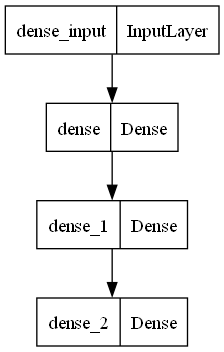

In [16]:
tf.keras.utils.plot_model(model)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________
